# Cleaning the data

In [ ]:
# Importing Libaries

import ast
import seaborn as sns
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)

# Filtering for United States

In [2]:
df_US = df[df['job_country'] == "United States"]

# Top Skills For Top Data Industry Roles

In [3]:
df_skills = df_US.explode(column="job_skills", ignore_index=True)

In [8]:
df_skills_count = df_skills.groupby(by=["job_title_short", "job_skills"]).size()

df_skills_count = df_skills_count.reset_index(name="skill_count").sort_values(by="skill_count", ascending=False)

In [37]:
df_jobs_total = df_US['job_title_short'].value_counts().reset_index(name="jobs_total") # Calculating the total jobs per data science roles

In [40]:
# Merging the two tables

df_skills_perc = pd.merge(df_skills_count, df_jobs_total, how="left", on="job_title_short")
df_skills_perc['skill_percent'] = (df_skills_perc['skill_count']/df_skills_perc['jobs_total'])*100

,job_title_short,job_skills,skill_count,jobs_total,skill_percent
0,Data Scientist,python,42379,58830,72.036376
1,Data Analyst,sql,34452,67816,50.802171
2,Data Scientist,sql,30034,58830,51.052184
3,Data Analyst,excel,27519,67816,40.578919
4,Data Scientist,r,26022,58830,44.232534
...,...,...,...,...,...
1865,Senior Data Engineer,asp.net core,1,9289,0.010765
1866,Cloud Engineer,ms access,1,423,0.236407
1867,Machine Learning Engineer,graphql,1,921,0.108578
1868,Senior Data Scientist,mariadb,1,12946,0.007724


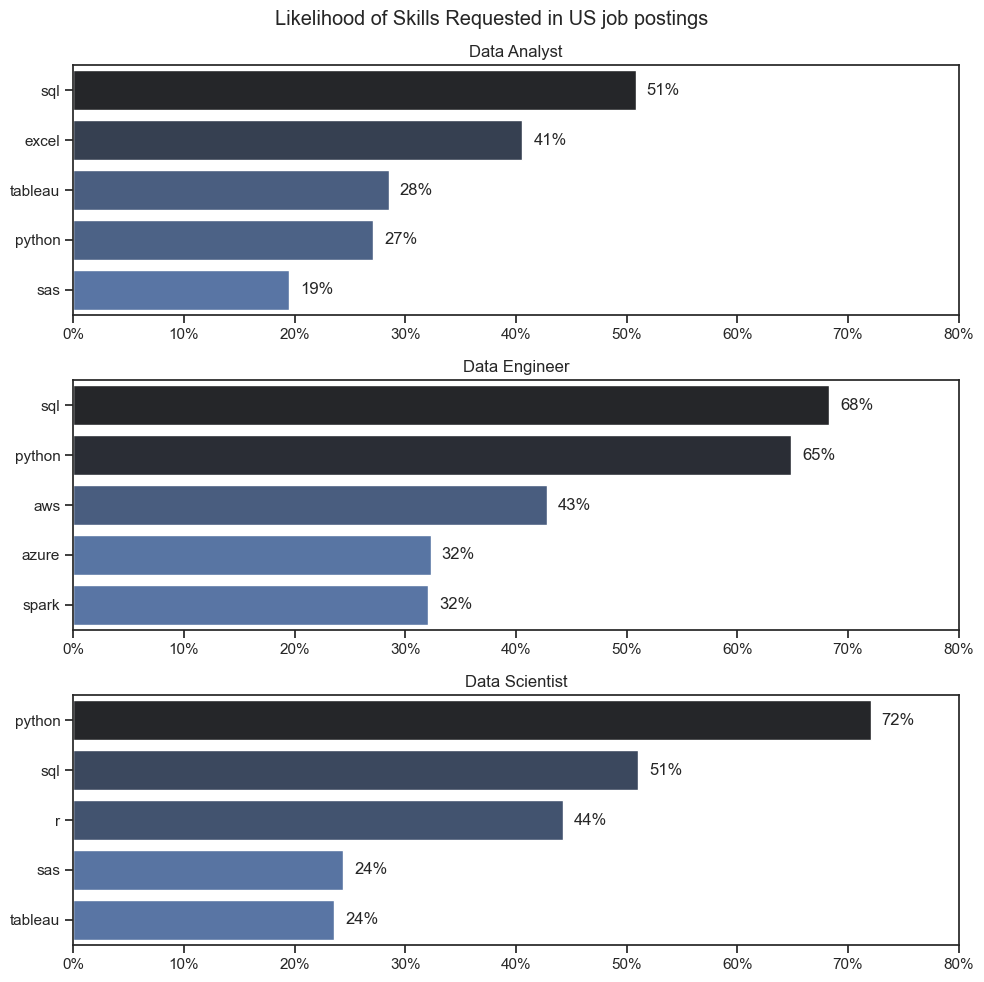

In [67]:
# Creating the visualization

job_titles = sorted(df_skills_perc['job_title_short'].unique().tolist()[:3])

fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style="ticks")
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].sort_values(by="skill_count", ascending=False).head(5)
    sns.barplot(data=df_plot, y="job_skills", x="skill_percent", ax=ax[i], legend=False, hue="skill_count", palette="dark:b_r")
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].set_title(job_title)
    # ax[i].invert_yaxis()
    ax[i].set_xlim(0, 80)
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{int(x)}%"))

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f"{v:.0f}%", va="center")
    
fig.set_size_inches(10, 10)
fig.suptitle("Likelihood of Skills Requested in US job postings")
fig.tight_layout()
